In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
company = pd.read_csv("Company_Data.csv") #Loading Dataset

In [3]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
company['Sales'].mean()

7.496325

In [5]:
company['Sales'].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9fa8114cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9f88da13d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9fa8114970>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9f88da1a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9f88da1df0>],
 'means': []}

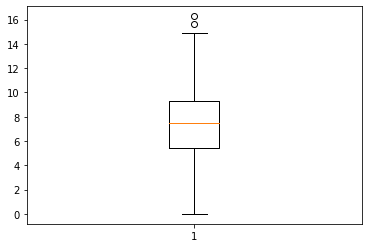

In [6]:
plt.boxplot(company['Sales'])   #Detecting Outlier

In [7]:
company['Sales'] = company['Sales'].replace({0:7.5}) #Replacing zero with mean value , assuming it a wring entry.

In [8]:
print("Highest allowed",company['Sales'].mean() + 3*(company['Sales'].std())) #detecting outliers

Highest allowed 15.91209272751287


In [9]:
company[company['Sales']>15]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
316,15.63,122,36,5,369,72,Good,35,10,Yes,Yes
376,16.27,141,60,19,319,92,Good,44,11,Yes,Yes


In [10]:
company['Sales']=company['Sales'].replace({16.27:15,15.63:15})  #Handle outliers

In [11]:
company['Sales'].describe()

count    400.000000
mean       7.510325
std        2.785335
min        0.160000
25%        5.415000
50%        7.495000
75%        9.320000
max       15.000000
Name: Sales, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9fba6475e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9fba647ca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9fba647280>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9fba5333a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9fba533700>],
 'means': []}

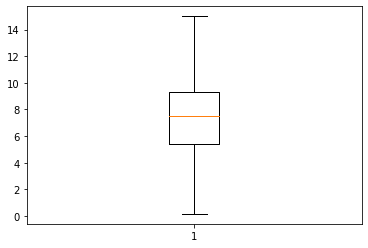

In [12]:
plt.boxplot(company['Sales'])   #Removed outliers

In [13]:
category = pd.cut(company.Sales,bins=[0,7.4,17],labels=['below average','above average'])
company.insert(0,'sales_classification',category)    #converted continuous into classified variable. 

In [14]:
company

,sales_classification,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,above average,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,above average,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,above average,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,below average,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,below average,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...
395,above average,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,below average,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,above average,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,below average,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [15]:
company = company.drop(columns=['Sales'])    #dropped sales column as already created new sales_classification column.

In [16]:
company

,sales_classification,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,above average,138,73,11,276,120,Bad,42,17,Yes,Yes
1,above average,111,48,16,260,83,Good,65,10,Yes,Yes
2,above average,113,35,10,269,80,Medium,59,12,Yes,Yes
3,below average,117,100,4,466,97,Medium,55,14,Yes,Yes
4,below average,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,above average,138,108,17,203,128,Good,33,14,Yes,Yes
396,below average,139,23,3,37,120,Medium,55,11,No,Yes
397,above average,162,26,12,368,159,Medium,40,18,Yes,Yes
398,below average,100,79,7,284,95,Bad,50,12,Yes,Yes


In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
encoder = LabelEncoder()  #providing labels to categorical data.

In [19]:
company['sales_classification'] = encoder.fit_transform(company['sales_classification']) 

In [20]:
company

,sales_classification,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0,138,73,11,276,120,Bad,42,17,Yes,Yes
1,0,111,48,16,260,83,Good,65,10,Yes,Yes
2,0,113,35,10,269,80,Medium,59,12,Yes,Yes
3,1,117,100,4,466,97,Medium,55,14,Yes,Yes
4,1,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,0,138,108,17,203,128,Good,33,14,Yes,Yes
396,1,139,23,3,37,120,Medium,55,11,No,Yes
397,0,162,26,12,368,159,Medium,40,18,Yes,Yes
398,1,100,79,7,284,95,Bad,50,12,Yes,Yes


In [21]:
company['sales_classification'].value_counts()   #sales below average and above average count.

0    207
1    193
Name: sales_classification, dtype: int64

In [28]:
company

,sales_classification,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0,138,73,11,276,120,Bad,42,17,Yes,Yes
1,0,111,48,16,260,83,Good,65,10,Yes,Yes
2,0,113,35,10,269,80,Medium,59,12,Yes,Yes
3,1,117,100,4,466,97,Medium,55,14,Yes,Yes
4,1,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,0,138,108,17,203,128,Good,33,14,Yes,Yes
396,1,139,23,3,37,120,Medium,55,11,No,Yes
397,0,162,26,12,368,159,Medium,40,18,Yes,Yes
398,1,100,79,7,284,95,Bad,50,12,Yes,Yes


In [31]:
dummies = pd.get_dummies(company['ShelveLoc'])   #created dummy variable.

In [33]:
company = pd.concat([company,dummies],axis=1) 

In [36]:
company = company.rename(columns = {'Bad':'shelve_loc_bad','Good':'shelve_loc_good','Medium':'shelve_loc_medium'})

In [41]:
company = company.drop(columns=['ShelveLoc'])

In [42]:
company

,sales_classification,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,shelve_loc_bad,shelve_loc_good,shelve_loc_medium
0,0,138,73,11,276,120,42,17,Yes,Yes,1,0,0
1,0,111,48,16,260,83,65,10,Yes,Yes,0,1,0
2,0,113,35,10,269,80,59,12,Yes,Yes,0,0,1
3,1,117,100,4,466,97,55,14,Yes,Yes,0,0,1
4,1,141,64,3,340,128,38,13,Yes,No,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0,138,108,17,203,128,33,14,Yes,Yes,0,1,0
396,1,139,23,3,37,120,55,11,No,Yes,0,0,1
397,0,162,26,12,368,159,40,18,Yes,Yes,0,0,1
398,1,100,79,7,284,95,50,12,Yes,Yes,1,0,0


In [44]:
company = company.replace({'Yes':1 ,'No':0})  #converted data into 1 and 0.

In [53]:
labels = company.iloc[:,0]

In [54]:
features = company.iloc[:,1:]

In [55]:
from sklearn.model_selection import train_test_split  #model validation.

In [56]:
x_train,x_test,y_train,y_test = train_test_split(features , labels ,test_size=0.3)

In [123]:
from sklearn.tree import DecisionTreeClassifier    #used a decision tree classifier.

In [146]:
model = DecisionTreeClassifier(criterion = 'gini',max_depth=4,class_weight='balanced')

In [147]:
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=4)

In [148]:
model.get_n_leaves()

14

In [149]:
preds = model.predict(x_test)

In [150]:
preds

array([1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0])

In [151]:
pd.Series(preds).value_counts()

1    66
0    54
dtype: int64

In [152]:
from sklearn.metrics import classification_report,accuracy_score

In [153]:
print(classification_report(preds,y_test))  #classification score.

              precision    recall  f1-score   support

           0       0.67      0.76      0.71        54
           1       0.78      0.70      0.74        66

    accuracy                           0.73       120
   macro avg       0.73      0.73      0.72       120
weighted avg       0.73      0.72      0.73       120



In [154]:
accuracy_score(y_test,preds)*100 #accuracy in perecentage.

72.5

In [155]:
from sklearn import tree

[Text(186.7153846153846, 195.696, 'X[10] <= 0.5\ngini = 0.5\nsamples = 280\nvalue = [140.0, 140.0]'),
 Text(103.01538461538462, 152.208, 'X[4] <= 105.5\ngini = 0.483\nsamples = 221\nvalue = [91.096, 131.642]'),
 Text(51.50769230769231, 108.72, 'X[5] <= 68.5\ngini = 0.432\nsamples = 74\nvalue = [49.863, 22.985]'),
 Text(25.753846153846155, 65.232, 'X[1] <= 25.5\ngini = 0.31\nsamples = 56\nvalue = [44.11, 10.448]'),
 Text(12.876923076923077, 21.744, 'gini = 0.304\nsamples = 5\nvalue = [0.959, 4.179]'),
 Text(38.63076923076923, 21.744, 'gini = 0.222\nsamples = 51\nvalue = [43.151, 6.269]'),
 Text(77.26153846153846, 65.232, 'X[0] <= 123.5\ngini = 0.431\nsamples = 18\nvalue = [5.753, 12.537]'),
 Text(64.38461538461539, 21.744, 'gini = 0.304\nsamples = 15\nvalue = [2.877, 12.537]'),
 Text(90.13846153846154, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [2.877, 0.0]'),
 Text(154.52307692307693, 108.72, 'X[0] <= 122.5\ngini = 0.399\nsamples = 147\nvalue = [41.233, 108.657]'),
 Text(128.76923076923

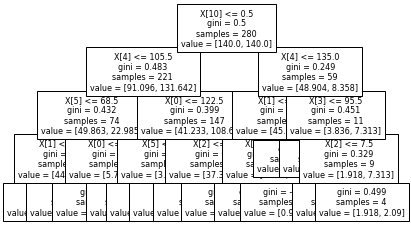

In [158]:
tree.plot_tree(model,fontsize =8)